In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
df = pd.read_csv('data.csv')

In [69]:
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0    Male  10.0             0              0         No Info  16.83   
1  Female   3.0             0              0         No Info  27.32   
2  Female  42.0             0              0           never  24.69   
3  Female  70.0             0              0           never  27.32   
4  Female  20.0             0              0           never  18.51   

   HbA1c_level  blood_glucose_level  diabetes  
0          4.0                  155         0  
1          3.5                  126         0  
2          5.0                  140         0  
3          4.5                  159         0  
4          4.8                   80         0  


In [70]:
#Kiểm tra dữ liệu NULL
null_values = df.isnull().sum()
null_values

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [71]:
#Kiểm tra và in ra số dòng trùng lặp
duplicate_rows = df[df.duplicated()]
print("Số dòng trùng lặp:", duplicate_rows.shape[0])

Số dòng trùng lặp: 0


In [72]:
df.shape

(16964, 9)

In [73]:
df = df.drop_duplicates()

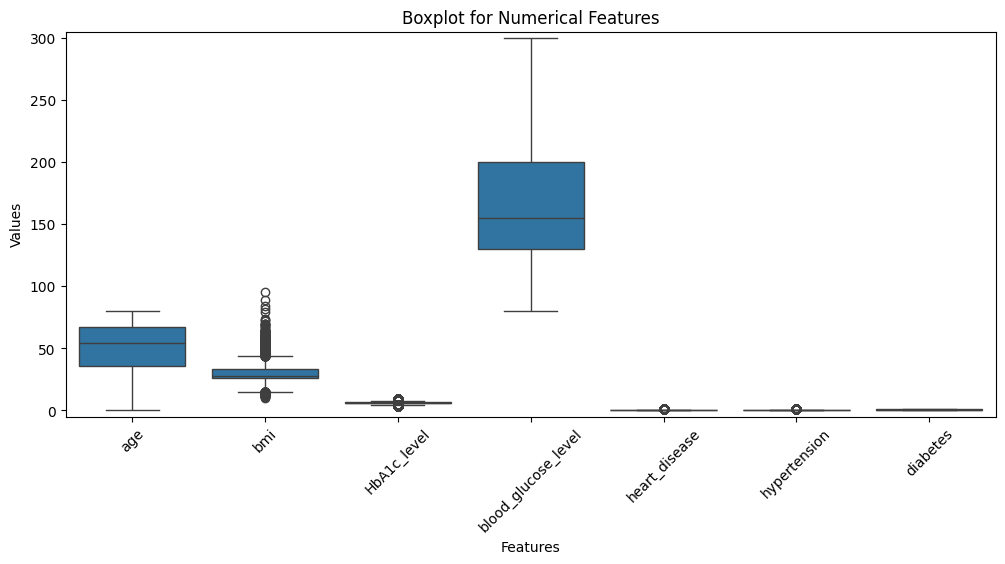

In [74]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','heart_disease','hypertension','diabetes']  # Danh sách các cột số

# Chuyển đổi DataFrame sang dạng dài chỉ với các cột số
df_melted = df[numerical_features].melt(var_name='Features', value_name='Values')

# Vẽ boxplot cho tất cả các trường dữ liệu
plt.figure(figsize=(12, 5))  # Kích thước biểu đồ
sns.boxplot(x='Features', y='Values', data=df_melted)
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.ylim(df_melted['Values'].min() - 5, df_melted['Values'].max() + 5)  # Điều chỉnh giới hạn trục y

plt.show()

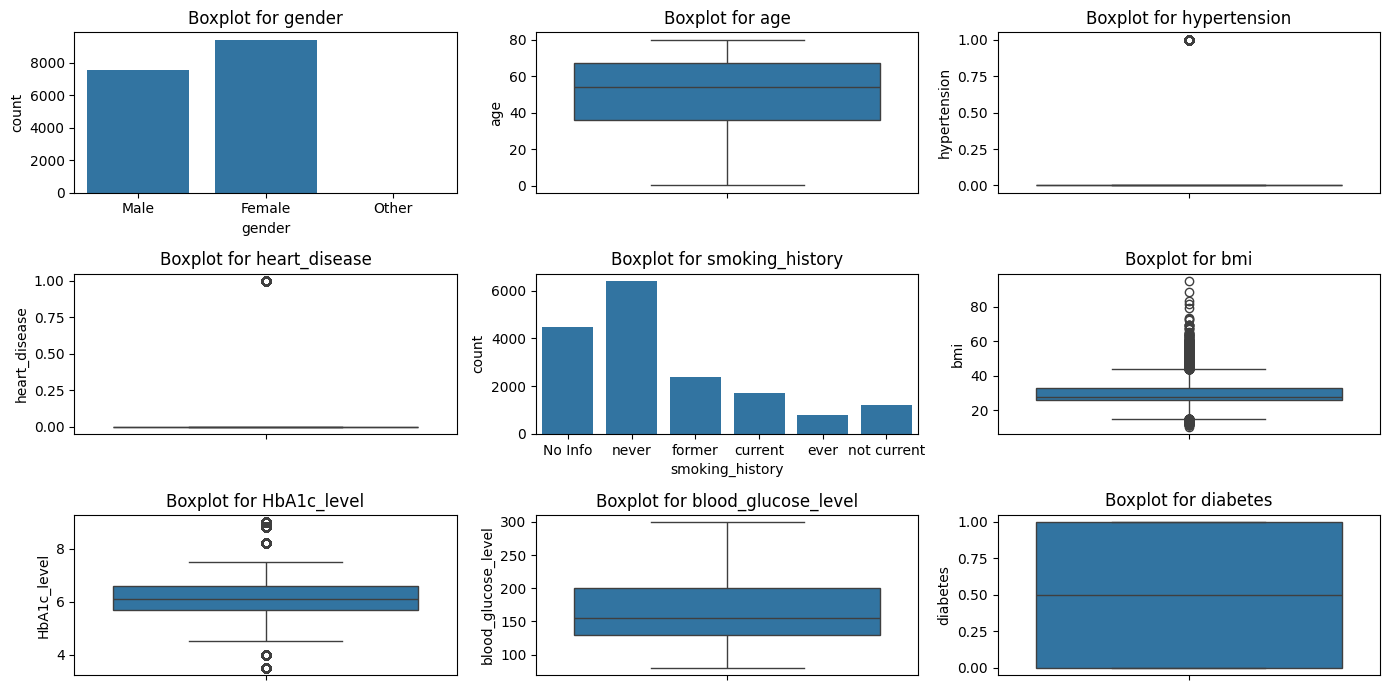

In [75]:
features = ['gender', 'age', 'hypertension', 'heart_disease',
            'smoking_history', 'bmi', 'HbA1c_level',
            'blood_glucose_level', 'diabetes']

# Tạo boxplot cho từng trường
plt.figure(figsize=(14,7))  # Kích thước biểu đồ

for i, feature in enumerate(features):
    plt.subplot(3,3, i + 1)  # Chia lưới 5 hàng 2 cột
    if df[feature].dtype == 'object':
        # Nếu là cột phân loại (categorical)
        sns.countplot(x=feature, data=df)
    else:
        # Nếu là cột số
        sns.boxplot(y=df[feature])
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

In [76]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)  # Tính Q1
    Q3 = df[feature].quantile(0.75)  # Tính Q3
    IQR = Q3 - Q1  # Tính IQR
    lower_bound = Q1 - 1.5 * IQR  # Giới hạn dưới
    upper_bound = Q3 + 1.5 * IQR  # Giới hạn trên
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    

In [77]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)  # Tính Q1
    Q3 = df[feature].quantile(0.75)  # Tính Q3
    IQR = Q3 - Q1  # Tính IQR
    lower_bound = Q1 - 1.5 * IQR  # Giới hạn dưới
    upper_bound = Q3 + 1.5 * IQR  # Giới hạn trên
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

C:\Users\phuon\AppData\Local\Temp\ipykernel_18224\2818452465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Features', y='Values', data=df_melted, palette='Set2')  # Sử dụng palette 'Set2'


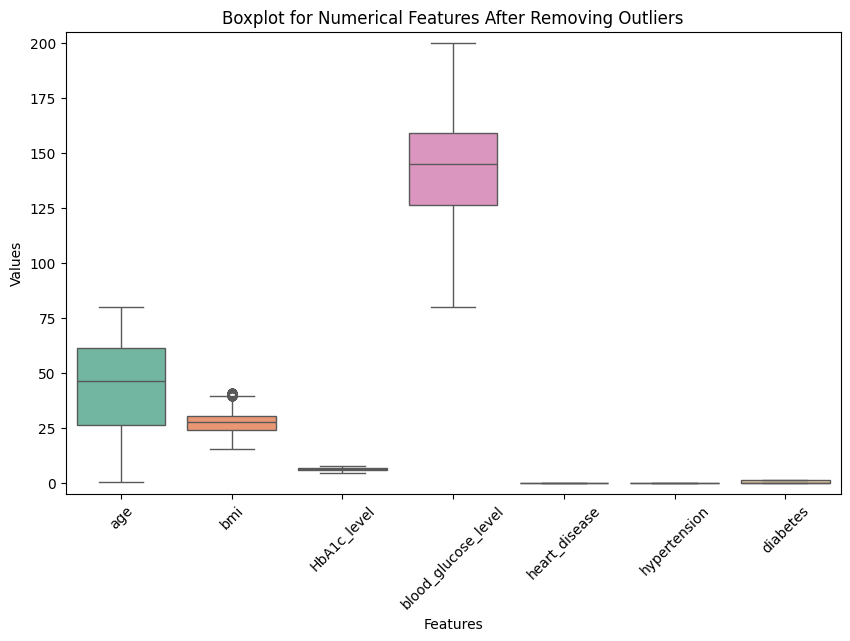

In [78]:
df_melted = df[numerical_features].melt(var_name='Features', value_name='Values')

# Vẽ boxplot cho tất cả các trường dữ liệu với mỗi thuộc tính một màu khác nhau
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
sns.boxplot(x='Features', y='Values', data=df_melted, palette='Set2')  # Sử dụng palette 'Set2'
plt.title('Boxplot for Numerical Features After Removing Outliers')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.ylim(df_melted['Values'].min() - 5, df_melted['Values'].max() + 5)  # Điều chỉnh giới hạn trục y

plt.show()

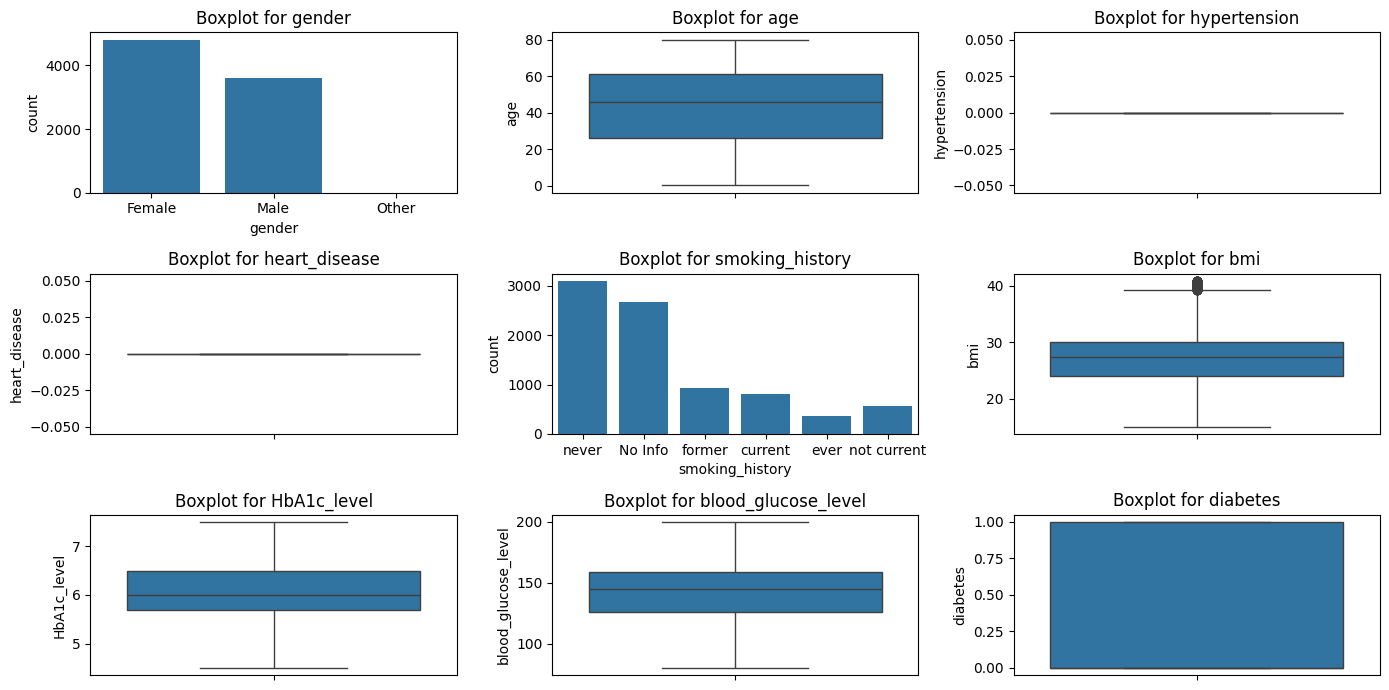

In [79]:
features = ['gender', 'age', 'hypertension', 'heart_disease',
            'smoking_history', 'bmi', 'HbA1c_level',
            'blood_glucose_level', 'diabetes']

# Tạo boxplot cho từng trường
plt.figure(figsize=(14,7))  # Kích thước biểu đồ

for i, feature in enumerate(features):
    plt.subplot(3,3, i + 1)  # Chia lưới 5 hàng 2 cột
    if df[feature].dtype == 'object':
        # Nếu là cột phân loại (categorical)
        sns.countplot(x=feature, data=df)
    else:
        # Nếu là cột số
        sns.boxplot(y=df[feature])
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()

In [80]:
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 2, 'No Info': -1, 'former': 1, 'not current': 3})
df['gender'] = df['gender'].map({'Female': 1, 'Male': 2,'Other':3})

In [81]:
print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
2       1  42.0             0              0              0.0  24.69   
3       1  70.0             0              0              0.0  27.32   
4       1  20.0             0              0              0.0  18.51   
5       1  57.0             0              0              0.0  32.52   
6       2  57.0             0              0             -1.0  20.37   

   HbA1c_level  blood_glucose_level  diabetes  
2          5.0                  140         0  
3          4.5                  159         0  
4          4.8                   80         0  
5          6.5                  160         0  
6          4.8                   80         0  


In [82]:
scaler = MinMaxScaler()

In [83]:
# Chuẩn hóa dữ liệu
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [84]:
print(df.head())

   gender       age  hypertension  heart_disease  smoking_history       bmi  \
2       1  0.524048           0.0            0.0              0.0  0.372914   
3       1  0.874749           0.0            0.0              0.0  0.474971   
4       1  0.248497           0.0            0.0              0.0  0.133101   
5       1  0.711924           0.0            0.0              0.0  0.676756   
6       2  0.711924           0.0            0.0             -1.0  0.205277   

   HbA1c_level  blood_glucose_level  diabetes  
2     0.166667             0.500000       0.0  
3     0.000000             0.658333       0.0  
4     0.100000             0.000000       0.0  
5     0.666667             0.666667       0.0  
6     0.100000             0.000000       0.0  


In [85]:
# Bước 1: Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')

In [86]:
# Bước 2: Mã hóa các biến phân loại
df['gender'] = df['gender'].map({'Female': 1, 'Male': 2,'Other':3})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 2, 'No Info': -1, 'former': 1, 'not current': 3})

In [87]:
# Bước 3: Tính toán ma trận tương quan
correlation_matrix = df.corr()

In [88]:
# Bước 4: Hiển thị ma trận tương quan
print(correlation_matrix)

                       gender       age  hypertension  heart_disease  \
gender               1.000000  0.011804      0.009398       0.089627   
age                  0.011804  1.000000      0.251003       0.253894   
hypertension         0.009398  0.251003      1.000000       0.102124   
heart_disease        0.089627  0.253894      0.102124       1.000000   
smoking_history      0.017300  0.201891      0.074505       0.052031   
bmi                 -0.035489  0.270411      0.151670       0.050440   
HbA1c_level          0.032976  0.289296      0.151084       0.129787   
blood_glucose_level  0.031396  0.266090      0.132027       0.119615   
diabetes             0.060352  0.490268      0.251548       0.219072   

                     smoking_history       bmi  HbA1c_level  \
gender                      0.017300 -0.035489     0.032976   
age                         0.201891  0.270411     0.289296   
hypertension                0.074505  0.151670     0.151084   
heart_disease              

In [89]:
# Bước 5: Lọc các biến có độ tương quan >= 0.2
threshold = 0.2
filtered_corr = correlation_matrix[correlation_matrix.abs() == threshold]

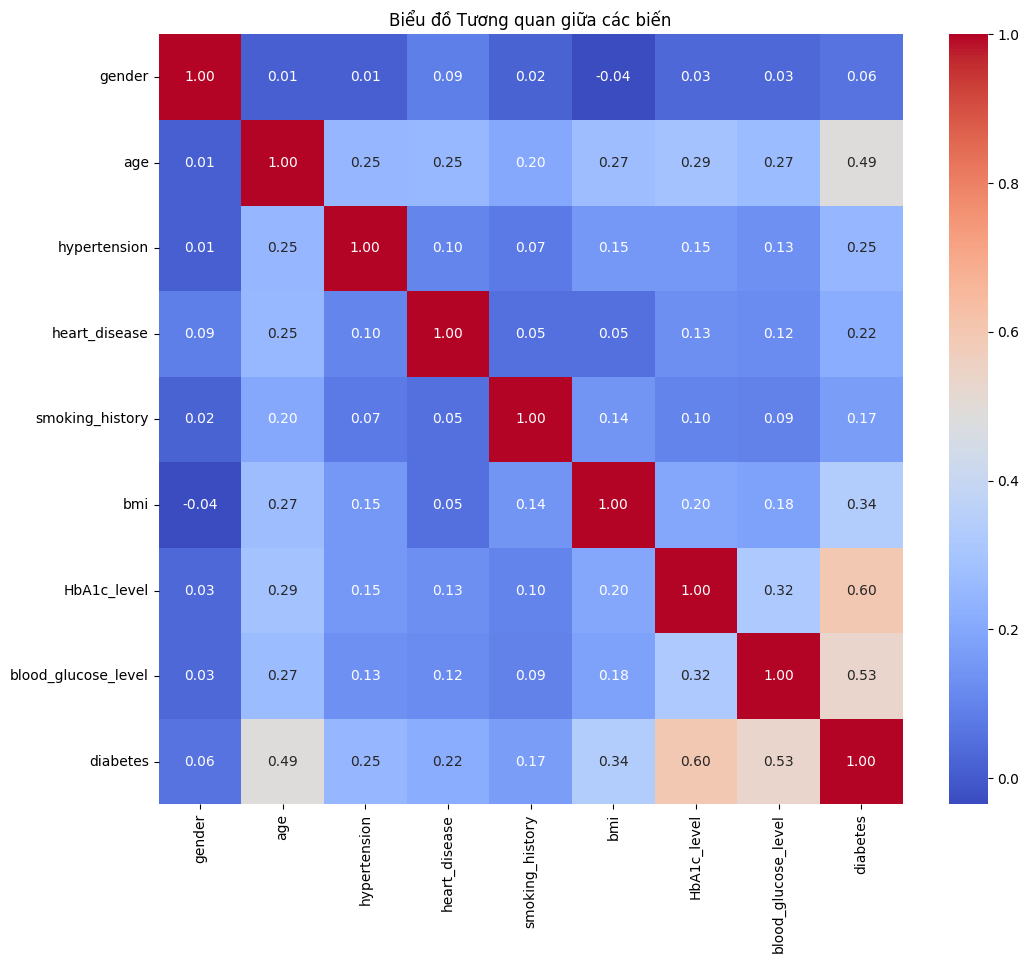

In [90]:
# Bước 6: Vẽ heatmap cho các biến có độ tương quan >= 0.2

plt.figure(figsize=(12, 10))  # Kích thước của biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ Tương quan giữa các biến')
plt.show()


In [91]:
majority_class = df[df['diabetes'] == 0]  # Lớp chiếm ưu thế
minority_class = df[df['diabetes'] == 1]  # Lớp thiểu số

In [92]:
# Hiển thị kích thước các lớp
print(f"Số lượng mẫu lớp chiếm ưu thế: {len(majority_class)}")
print(f"Số lượng mẫu lớp thiểu số: {len(minority_class)}")

Số lượng mẫu lớp chiếm ưu thế: 8482
Số lượng mẫu lớp thiểu số: 8482


In [93]:
# Số lượng mẫu mong muốn cho mỗi lớp
num_samples = len(minority_class)

In [94]:
# Chọn ngẫu nhiên mẫu từ lớp chiếm ưu thế
majority_sample = majority_class.sample(num_samples, random_state=42)

In [95]:
# Kết hợp các lớp lại
undersampled_df = pd.concat([majority_sample, minority_class])

In [96]:
# Kiểm tra kích thước dữ liệu sau khi undersampling
print(undersampled_df['diabetes'].value_counts())

diabetes
0    8482
1    8482
Name: count, dtype: int64


In [97]:
print(undersampled_df['diabetes'].value_counts())

diabetes
0    8482
1    8482
Name: count, dtype: int64


In [98]:
# Lưu dữ liệu đã undersample
undersampled_df.to_csv('neww.csv', index=False)

Lớp 0: 8482
Lớp 1: 8482
gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history        float64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


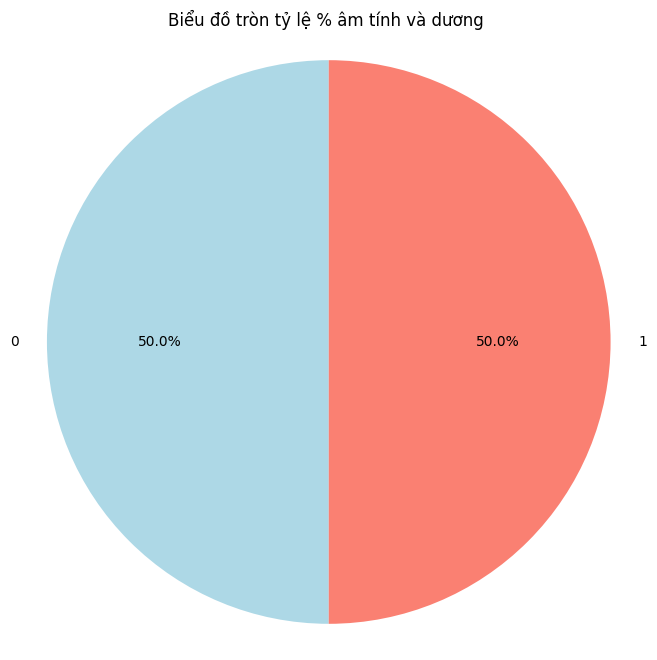

In [99]:
# Bước 1: Đọc dữ liệu từ tệp CSV
df = pd.read_csv('neww.csv')  # Thay thế bằng đường dẫn tới tệp CSV của bạn
# Bước 2: Tính toán số lượng từng nhóm trong biến diabetes
diabetes_counts = df['diabetes'].value_counts()
# Bước 3: Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
print(f"Lớp 0: {diabetes_counts.get(0, 0)}")
print(f"Lớp 1: {diabetes_counts.get(1, 0)}")
print(df.dtypes)

plt.title('Biểu đồ tròn tỷ lệ % âm tính và dương ')
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()